In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageChops

In [2]:
train = pd.read_csv('/Users/kaivuxu/Downloads/mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
rownum=6875

In [4]:
if rownum > -1 and rownum < 60000:
    pixels = train.iloc[rownum][1:].values.reshape(28,28)
    array = np.array(pixels,dtype=np.uint8)
    img = Image.fromarray(array)
else:
    print('wrong')

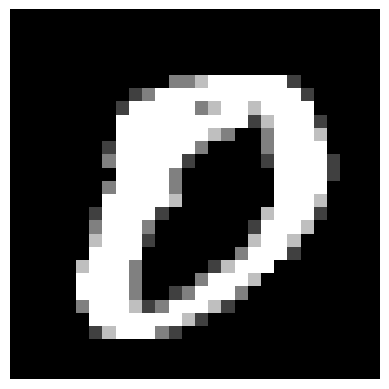

In [5]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [6]:
gray_img = img.convert('L')

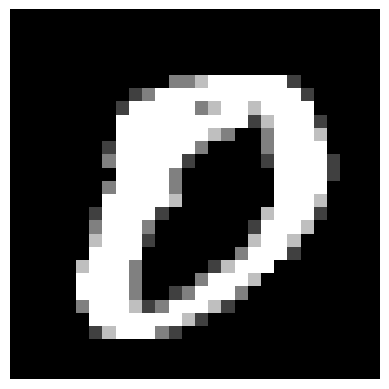

In [7]:
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

In [9]:
def histogram_equalization(img_array):
    # Step 1: Compute the histogram
    hist, bins = np.histogram(img_array.flatten(), bins=256, range=[0, 255])

    # Step 2: Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()  # Cumulative sum of the histogram
    cdf_normalized = cdf * float(hist.max()) / cdf.max()  # Normalize the CDF

    # Step 3: Normalize the image based on the CDF
    img_equalized = np.interp(img_array.flatten(), bins[:-1], cdf_normalized)
    
    # Reshape back to the original image shape
    img_equalized = img_equalized.reshape(img_array.shape)
    return np.uint8(img_equalized)

# Perform histogram equalization on the original image array
equalized_array = histogram_equalization(gray_array)

# Convert back to image
equalized_img = Image.fromarray(equalized_array)
equalized_img.show()


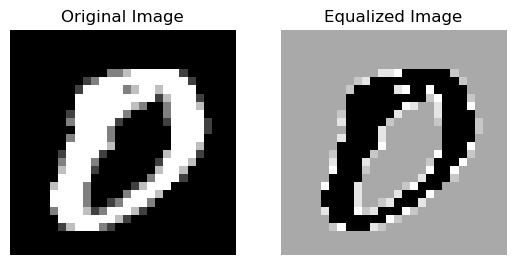

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Convert the image to grayscale
gray_img = img.convert("L")
gray_array = np.array(gray_img)

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Perform the transformation (e.g., histogram equalization)
equalized_img = Image.fromarray(histogram_equalization(gray_array))  # We'll define this function
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.show()


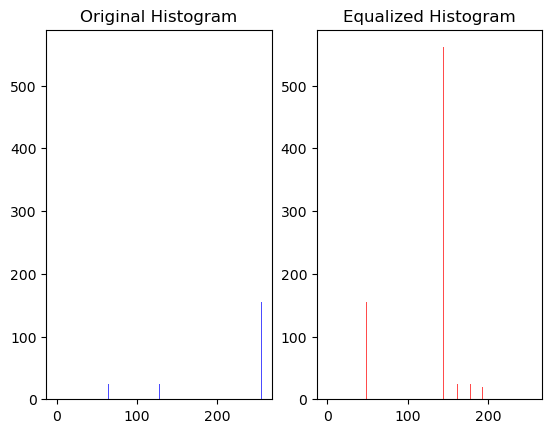

In [12]:
# Plot the histograms of the original and equalized images
plt.subplot(1, 2, 1)
plt.hist(gray_array.flatten(), bins=256, range=[0, 255], color='blue', alpha=0.7)
plt.title("Original Histogram")

plt.subplot(1, 2, 2)
plt.hist(equalized_array.flatten(), bins=256, range=[0, 255], color='red', alpha=0.7)
plt.title("Equalized Histogram")

plt.show()


In [13]:
def histogram_stretching(img_array):
    # Step 1: Find the min and max pixel values
    min_val = np.min(img_array)
    max_val = np.max(img_array)
    
    # Step 2: Stretch the histogram to the full range (0-255)
    stretched = ((img_array - min_val) / (max_val - min_val)) * 255
    
    # Return the stretched image
    return np.uint8(stretched)

# Perform histogram stretching on the original image array
stretched_array = histogram_stretching(gray_array)

# Convert to image and display
stretched_img = Image.fromarray(stretched_array)
stretched_img.show()
